In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('training_mush.csv')

data.head()
X_train = data.drop('class', axis=1)
y_train = data['class']

In [3]:
parameters = {'n_estimators': range(10, 51, 10), 'max_depth': range(1, 13, 2), 'min_samples_leaf': range(1, 8), 'min_samples_split': range(2, 10, 2)}
clf = RandomForestClassifier(random_state=0)

grid_search_rf = GridSearchCV(clf, param_grid=parameters, cv=3, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/ma/core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [4]:
grid_search_rf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

<Axes: xlabel='feature_importances', ylabel='features'>

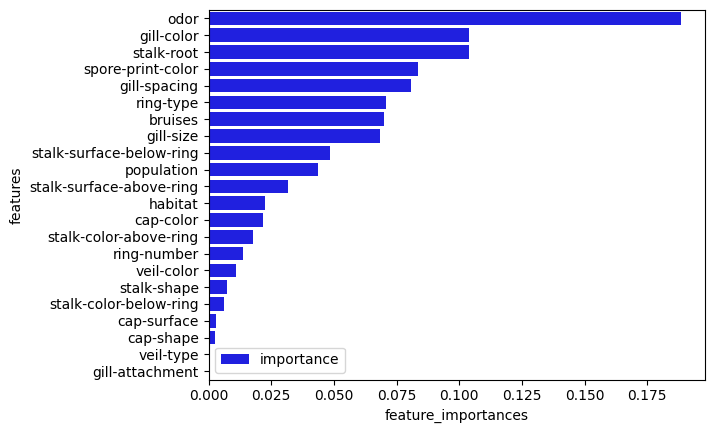

In [5]:
best_rf = grid_search_rf.best_estimator_
feature_importances = grid_search_rf.best_estimator_.feature_importances_

feature_importances_pd = pd.DataFrame({"features": list(X_train),
                                       "feature_importances": feature_importances}).sort_values('feature_importances', ascending=False)

sns.barplot(x="feature_importances", y="features", data=feature_importances_pd,
            label="importance", color="b")

In [6]:
X_test = pd.read_csv('testing_mush.csv')

predictions = pd.Series(best_rf.predict(X_test))
predictions.value_counts()

0    1055
1     976
Name: count, dtype: int64

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_test = pd.read_csv('testing_y_mush.csv')

<Axes: >

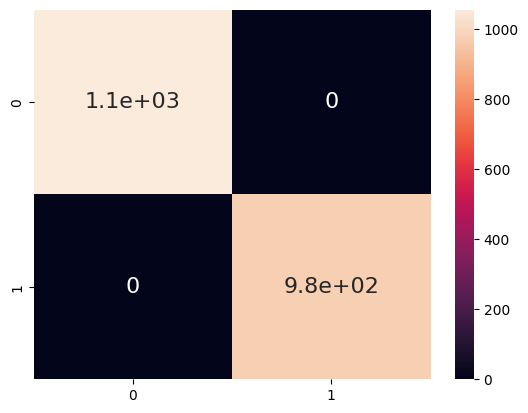

In [14]:
cm = confusion_matrix(y_true=y_test, y_pred=predictions)

sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [15]:
accuracy_score(y_test, predictions)

1.0